In [8]:
import time
import poloniex
import pandas as pd
#  描写用の matplotlib
import matplotlib.pyplot as plt

# 描画を綺麗に表示する
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

# poloniex APIの準備
polo = poloniex.Poloniex()

# 5分間隔（サンプリング間隔300秒）で100日分読み込む
chart_data = polo.returnChartData('BTC_ETH', period=300, start=time.time()-polo.DAY*100, end=time.time())
#print(chart_data)

# pandasにデータの取り込み
df = pd.DataFrame(chart_data)
# df.head(10)
# df['close']


In [9]:
# 短期線：窓幅1日（5分×12×24）
data_s = pd.rolling_mean(df['close'], 12 * 24) 

# 長期線：窓幅5日（5分×12×24×5）
data_l = pd.rolling_mean(df['close'], 12 * 24 * 5)

/Users/takashi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=288,center=False).mean()
  from ipykernel import kernelapp as app
/Users/takashi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1440,center=False).mean()


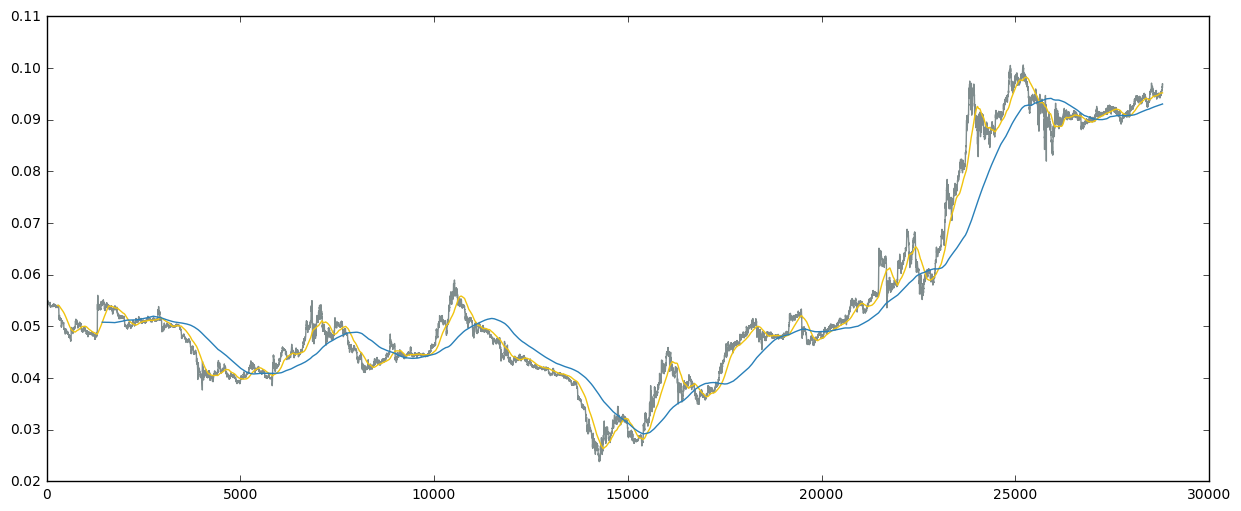

In [10]:
# 短期線と長期線もプロット
plt.plot(df['close'], color='#7f8c8d')
plt.plot(data_s, color='#f1c40f')  # 短期線
plt.plot(data_l, color='#2980b9')  # 長期線
plt.show()